# Reading Data, Cleaning and Visualizing

## Importing important libraries and initializing jupyter magic

In [1]:
import os
import pandas as pd          #  DataFrame i.e. Tablen von Daten zu bearbeiten, manipulieren usw.
from xml.dom import minidom  # Xml lesen und bearbeiten tool
import numpy as np           # Sehr agiles Mathematik tool
import matplotlib.pyplot as plt  # Ein basic library für daten visualizierung
import skansensor as ss     #  Fady's für Skan und Steffen selbstgemachtes library
%matplotlib inline          
# Notebook magic um zu Plots schnell zu zeichnen

from pprint import pprint

## List files in a directory

In [7]:
l_dir = os.listdir()
l_dir

['Reading data from different files.ipynb',
 '1811',
 '__pycache__',
 'Data Cleaning and Visualization.ipynb',
 'skansensor.py',
 '.ipynb_checkpoints',
 '1718',
 '.Rhistory',
 'Reading and Visualizing Dropsense and Piccaro.ipynb',
 'workflow.py',
 'data_20180628',
 'data_collector.py',
 'Beziercurve.ipynb',
 'Tryingout.ipynb']

## Function to read the .MTA file and extract the data into a pandas DataFrame

## Read Dropsense Data

In [8]:
df_dropsense = ss.read_dropsense('./1811/Sense.MTA')

## Read Piccaro Data

In [10]:
df_picarro = ss.read_picarro('./1811/Picarro.dat')

### Choose only the data more than 500s

In [5]:
df_dropsense = ss.trunc_after_time(df_dropsense)
df_picarro = ss.trunc_after_time(df_picarro)

## filter the Dropsense data according to the time interval provided by Piccaro

In [11]:
df_fitted = ss.fit(df_picarro, df_dropsense)

In [13]:
df_fitted.head()

,index,time,data_dropsense,data_picarro
0,47,505,NaN,-0.018532
1,48,517,NaN,-0.018500
2,49,527,0.047075,-0.018646
3,50,538,0.046450,-0.022705
4,51,548,0.041579,-0.020204


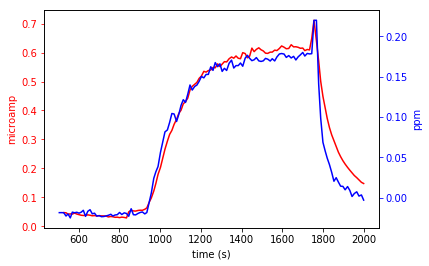

In [14]:
fig, ax1 = plt.subplots()

ax1.plot(df_fitted['time'], df_fitted['data_dropsense'], c='r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('microamp' , color='r')
ax1.tick_params('y',colors='r')

ax2 = ax1.twinx()
ax2.plot(df_fitted['time'], df_fitted['data_picarro'], c='b')
ax2.set_ylabel('ppm', color='b')
ax2.tick_params('y', colors='b')

## Die Daten haben eine Abweichung ...

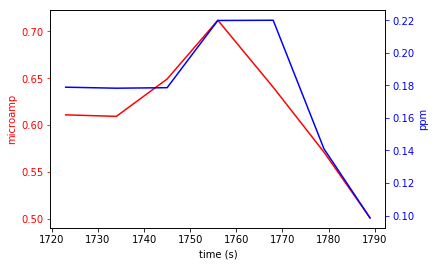

In [8]:
zoom = df_fitted[(df_fitted['time']<1800) & (df_fitted['time']>1720)]
fig, ax1 = plt.subplots()

ax1.plot(zoom['time'], zoom['data_dropsense'], c='r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('microamp' , color='r')
ax1.tick_params('y',colors='r')

ax2 = ax1.twinx()
ax2.plot(zoom['time'], zoom['data_picarro'], c='b')
ax2.set_ylabel('ppm', color='b')
ax2.tick_params('y', colors='b')

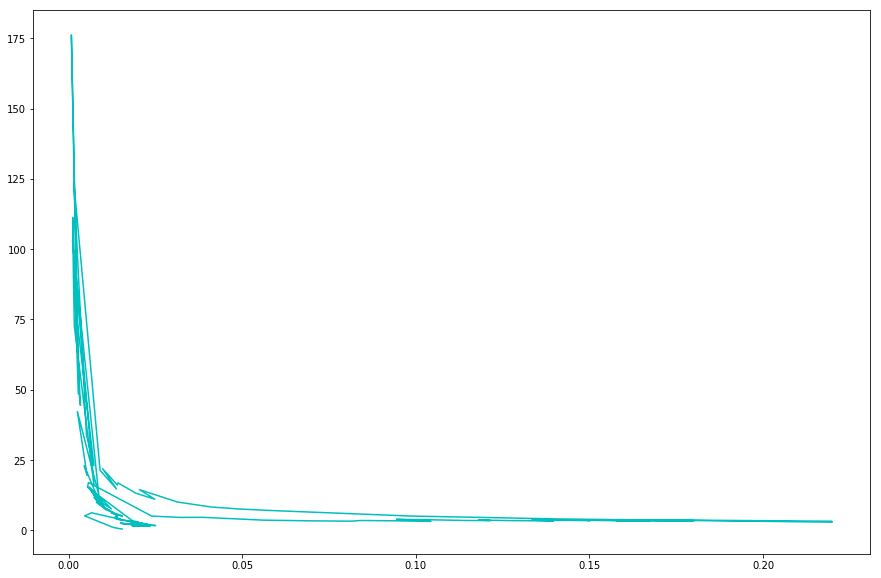

In [48]:
ds = df_fitted['data_dropsense']
p = np.abs(df_fitted['data_picarro'])

df_fitted['mamp_per_ppm'] = ds/p

fig = plt.figure(figsize=(15,10))
plt.plot(p, 'mamp_per_ppm', 'c', data=df_fitted)

In [13]:
df_fitted['mamp_per_ppm'].describe()

count    170.000000
mean      10.720600
std       22.737731
min        0.442793
25%        3.276330
50%        3.546041
75%        7.553815
max      176.185823
Name: mamp_per_ppm, dtype: float64

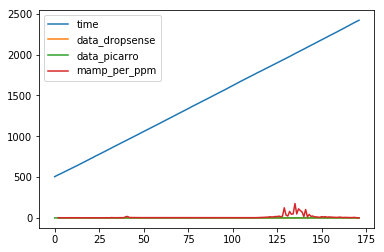

In [15]:
plt.plot()

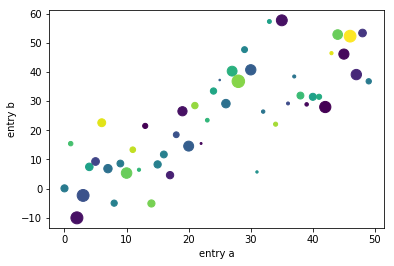

In [13]:
os.listdir('./1718')

['Piccaro.dat', 'dropsense.mta']

In [14]:
df_dropsense_1718 = ss.read_dropsense('./1718/dropsense.mta')

In [15]:
df_picarro_1718 = ss.read_picarro('./1718/Piccaro.dat')

In [16]:
df_dropsense_1718 = ss.trunc_after_time(df_dropsense_1718, t=700)
df_picarro_1718 = ss.trunc_after_time(df_picarro_1718, t=700)

In [17]:
df_fitted_1718 = ss.fit(df_picarro_1718, df_dropsense_1718)

In [7]:
df_norm_1718 = ss.normalize(df_fitted_1718, ['data_dropsense','data_picarro'])

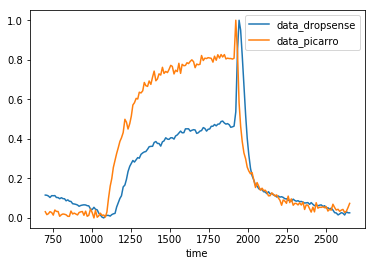

In [9]:
df_norm_1718.plot(x='time', y=['data_dropsense','data_picarro'])

In [25]:
df_try = df_norm_1718
df_try['diff'] = df_norm_1718['data_dropsense'] - df_norm_1718['data_piccaro']

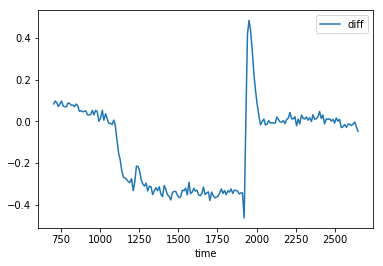

In [26]:
df_try.plot(x='time', y='diff')

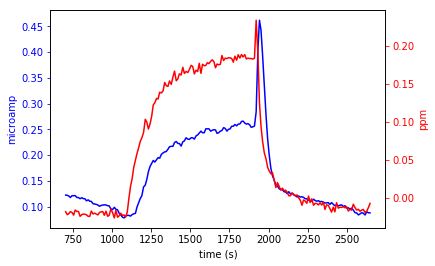

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(df_fitted_1718['time'], df_fitted_1718['data_dropsense'], c='b')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('microamp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_fitted_1718['time'], df_fitted_1718['data_picarro'], c='r')
ax2.set_ylabel('ppm', color='r')
ax2.tick_params('y', colors='r')

In [20]:
df_picarro_1718['H2O2'].max()

0.23364515518000004

In [30]:
ds = df_fitted['data_dropsense']
p = df_fitted['data_picarro']